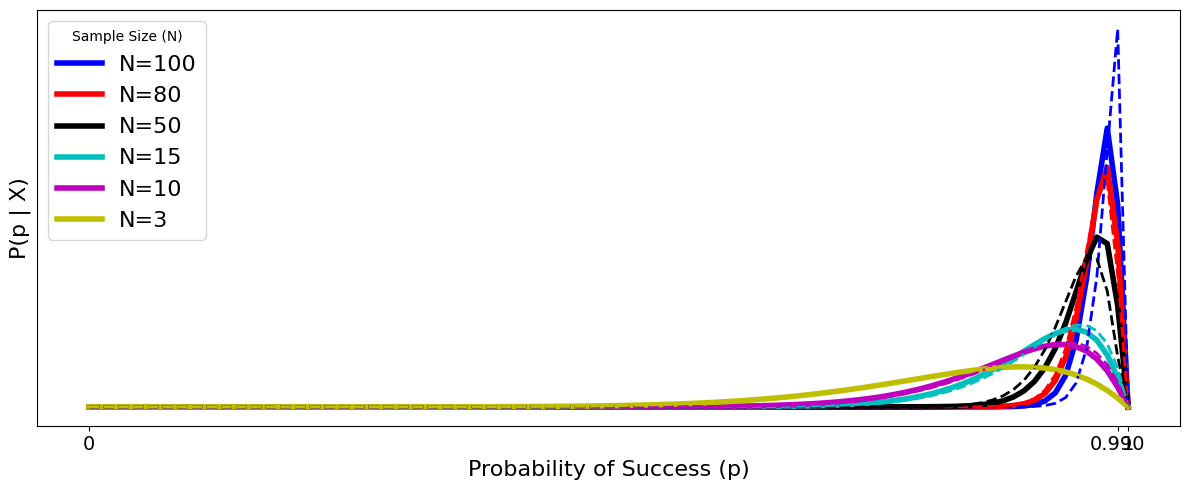

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as betadist

# Parameters
p_star = 0.99  # True probability of success
alpha = 7  # Parameter of prior distribution
beta = 2  # Parameter of prior distribution
NN = [100, 80, 50, 15, 10, 3]  # Sample sizes

# Create the figure
plt.figure(figsize=(12, 5))  # Adjust figure size as needed
# plt.axes('box', on=True)

# plt.hold(True)

# Plot expected posterior distribution
p = np.linspace(0, 1, 101)  # Discretized values for p
colors = ['b', 'r', 'k', 'c', 'm', 'y']  # Colors for plotting

for n, N in enumerate(NN):
    alpha_prime = N * p_star + alpha
    beta_prime = N * (1 - p_star) + beta
    posterior = betadist.pdf(p, alpha_prime, beta_prime)

    plt.plot(p, posterior, colors[n], label=f'N={N}', linewidth=4)

# Legends
plt.legend(fontsize=16, loc='upper left', title='Sample Size (N)')

# Plot posterior distributions for samples
for n, N in enumerate(NN):
    X = np.random.rand(N) < p_star  # Sample from Bernoulli distribution

    alpha_prime = np.sum(X) + alpha
    beta_prime = N - np.sum(X) + beta
    posterior = betadist.pdf(p, alpha_prime, beta_prime)

    plt.plot(p, posterior, colors[n] + '--', label=f'Sample Distribution (N={N})', linewidth=2)

# Labels and formatting
plt.xlabel('Probability of Success (p)', fontsize=16)
plt.ylabel('P(p | X)', fontsize=16)
plt.xticks([0, p_star, 1], ['0', f'{p_star:.3f}', '1'], fontsize=14)
plt.yticks([])
plt.tight_layout()

# Save the figure (replace 'figurename.png' with your desired filename)
plt.savefig('figurename.png', dpi=300)  # Adjust DPI for quality

plt.show()

In [12]:
p = np.linspace(0, 1, 1001)
p

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as betadist
from scipy.stats import binom

# Parameters
p_star = 0.01  # True probability of success
alpha = 7  # Parameter of prior distribution
beta = 2  # Parameter of prior distribution
error_range = 0.01

lower_limit_prob = p_star-error_range
upper_limit_prob = p_star+error_range

p = np.linspace(0, 1, 10001)  # Discretized values for p

for N in range(1,1000):
    # Expectation for Bernoulli distribution

    alpha_prime = N*p_star + alpha
    beta_prime = N*(1-p_star) + beta
    posterior = betadist.pdf(p, alpha_prime, beta_prime)

    p_map = np.argmax(posterior)/(len(p)-1)
    # print(p_map)
    if p_map > lower_limit_prob and p_map < upper_limit_prob:
      print(f'number of min samples for MAP is {N} for p_map {p_map}')
      break


for N in range(1,10000):

    #number of correct pred sigma X_i is k
    k = [i+1 for i in range(N)]
    likelihood = binom.pmf(k, N, p_star)

    p_mle = np.argmax(likelihood)/N
    if p_mle > lower_limit_prob and p_mle < upper_limit_prob:
      print(f'number of min samples for MLE is {N} for p_mle {p_mle}')
      break

number of min samples for MAP is 589 for p_map 0.0199
number of min samples for MLE is 199 for p_mle 0.005025125628140704
